In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import random
import tensorflow as tf
from torchvision.utils import make_grid
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
%matplotlib inline

In [2]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

print(get_default_device())

cuda


In [3]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [5]:
# dir_path= "C:/Users/Akshit/SGP/whole/input/plant-disease-dataset/train/Apple___Apple_scab"
# path = 'C:/Users/Akshit/SGP/whole/input/plant-disease-dataset/train/'
path = 'C:/Users/Akshit/Downloads/PlantVillage-Dataset-master/PlantVillage-Dataset-master/raw/color/'
classes = os.listdir(path)
classes


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [6]:
# img_paths =dir_path+'/' +chosen_image
# path to classes folder....
img_paths = [path+fol+'/' for fol in classes]


In [7]:
i=1
nums={}
for img_path in img_paths:
#     print(f"\n[{i}] info processing...   {img_path.split('/')[-2]}")
    img_list = os.listdir(img_path)
    nums[img_path.split('/')[-2]]= len(img_list)
#     print("images : ",len(img_list))
    
#     print("\n\n",img_list)
#     for choosen_img in img_list:
#         image_whole_path = img_path + choosen_img
# #         print("\n",image_whole_path)
#         image = np.expand_dims(plt.imread(image_whole_path),0)
#         cnt=0
#         for batch in gen.flow(image, batch_size=1, save_to_dir= img_path, save_prefix='aug-image-', save_format='jpeg'):
#             cnt+=1;
#             if cnt>0:
#                 break;
        
    i+=1
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Apple___Apple_scab,630
Apple___Black_rot,621
Apple___Cedar_apple_rust,275
Apple___healthy,1645
Blueberry___healthy,1502
Cherry_(including_sour)___healthy,854
Cherry_(including_sour)___Powdery_mildew,1052
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,513
Corn_(maize)___Common_rust_,1192
Corn_(maize)___healthy,1162


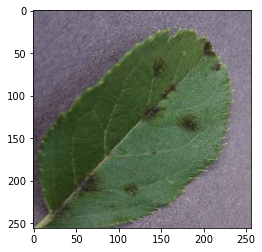

In [9]:
path = 'C:/Users/Akshit/SGP/whole/input/plant-disease-dataset/train/Apple___Apple_scab';
img_path = random.choice(os.listdir(path))
img_path = path + '/' +img_path
image = np.expand_dims(plt.imread(img_path),0)
plt.imshow(image[0])
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]

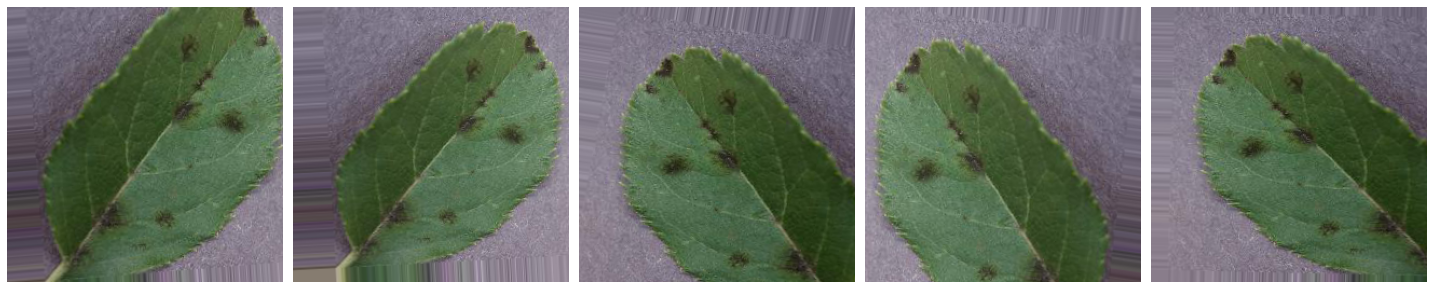

In [10]:
plotImages(aug_images)

In [184]:
i=0
for batch in gen.flow(image, batch_size=1, save_to_dir="C:/Users/Akshit/SGP/whole/input/plant-disease-dataset/train/Apple___Apple_scab", save_prefix='aug-image-', save_format='jpeg'):
    i+=1;
    if i>0:
        break;

In [180]:
i = 0
for batch in gen.flow_from_directory("C:/Users/Akshit/SGP/whole/input/plant-disease-dataset/train", target_size=(224,224),
    class_mode='categorical', shuffle=False, batch_size=1,
    save_to_dir='C:/Users/Akshit/SGP/whole/input/plant-disease-dataset/train/Apple___Apple_scab', save_prefix='aug-'):
    i += 1
    if i > 12: # save 20 images
        break  # otherwise the generator would loop indefinitely

Found 8 images belonging to 2 classes.
